In [2]:
import sys
print(f"Using Python Version: {(sys.version).split()[0]}")

Using Python Version: 3.12.9


We'll need some special functions:

In [3]:
from math import cos, sin

Import plotting (note the commented-out command to install, if not already available. Need to restart the kernel after install)

In [4]:
#!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt
from collections.abc import Callable
import numpy as np

# Problem 1

In [5]:
def bisection(func: Callable[[float],float], ab: list[float], eps: float = 1.e-08, N_max: int = 500):
    """Performs bisection 

    Arguments:
      func: the function for which is root is to be found
      ab: list of the form [a,b], the initial interval in which a root lies
      eps: convergence tolerance for the smallest interval size
      N_max: maximum iterations
    """

    a = ab[0]
    b = ab[1]
    temp = []
    f_a = func(a)
    
    if np.sign(f_a)*np.sign(func(b)) > 0:
        raise ValueError(
            "Initial Inverval [a,b] must be such that f(a)f(b) < 0")

    for n in range(N_max):
        p = a + 0.5*(b-a)
        print(f"{n}, {p}")
        temp.append(p)
        f_p = func(p)

        if 0.5*(b-a) < eps or abs(f_p) < eps:
            return p, temp

        if np.sign(f_a)*np.sign(f_p) > 0:
            f_a = f_p
            a = p
        else:
            b = p

    raise RuntimeError(f"Reached maximum iteration {N_max = }")

In [6]:
root, temp = bisection(lambda x: x - np.cos(x), [0,1.2])

0, 0.6
1, 0.8999999999999999
2, 0.75
3, 0.675
4, 0.7125
5, 0.73125
6, 0.740625
7, 0.7359374999999999
8, 0.73828125
9, 0.739453125
10, 0.7388671875
11, 0.7391601562500001
12, 0.739013671875
13, 0.7390869140625
14, 0.73905029296875
15, 0.7390686035156251
16, 0.7390777587890626
17, 0.7390823364257812
18, 0.7390846252441406
19, 0.7390857696533204
20, 0.7390851974487305
21, 0.7390849113464355
22, 0.739085054397583
23, 0.7390851259231568
24, 0.7390851616859436
25, 0.7390851438045503
26, 0.7390851348638535


In [7]:
# Compare observed vs theoretical number of bisection steps
import math

a, b = 0, 1.2  # initial interval
n_observed = len(temp)

tol = 1.e-8
n_theoretical = math.ceil(math.log2((b - a) / tol))

print(f"Observed steps: {n_observed}")
print(f"Theoretical minimum steps: {n_theoretical}")
print(f"Ratio (observed/theoretical): {n_observed/n_theoretical:.2f}")

Observed steps: 27
Theoretical minimum steps: 27
Ratio (observed/theoretical): 1.00


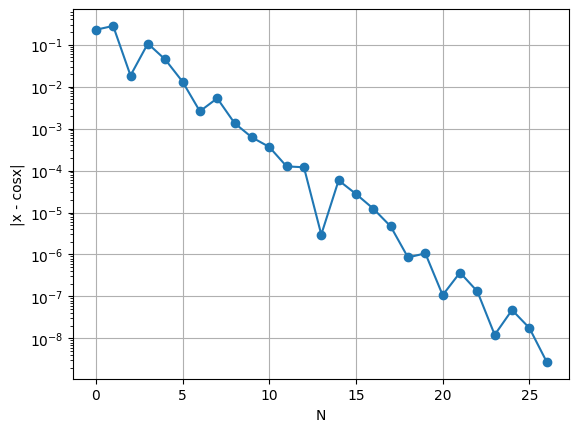

In [17]:
plt.semilogy(range(len(temp)), [abs(x - np.cos(x)) for x in temp], marker='o', label='|x - cosx|')
plt.xlabel('N')
plt.ylabel('|x - cosx|')
plt.grid()

## Problem 2 ##

On the interval $[0, 1.2]$:
- $\cos(x)$ is a strictly decreasing function (since $\sin(x) > 0$ for $x \in (0, 1.2)$).
- The function $g(x) = \cos(x)$ maps $[0, 1.2]$ into itself, because $\cos(0) = 1$ and $\cos(1.2) \approx 0.362$ (both within $[0, 1.2]$).
- The fixed-point equation $x = \cos(x)$ can be rewritten as $h(x) = x - \cos(x) = 0$.
- $h(x)$ is strictly increasing on $[0, 1.2]$ (since $h'(x) = 1 + \sin(x) > 1$).
- $h(0) = 0 - 1 = -1 < 0$, $h(1.2) \approx 1.2 - 0.362 = 0.838 > 0$.

By the Intermediate Value Theorem, $h(x)$ crosses zero exactly once in $[0, 1.2]$.

Therefore, $f(x) = \cos(x)$ has a unique fixed-point in $[0, 1.2]$. QED

In [9]:
def fixed_point(func: Callable[[float],float], x: float, eps: float = 1.e-08, N_max: int = 100) -> list[float]:
    """fixed-point iteration for scalar function

    Arguments:
      func: The function for which the fixed-point is to be found
      x: initial guess 
      eps: convergence tolerance (default 1.0e-08)
      N_max: maximum number of iterations (default 100)

    Returns:
      conv_history: convergence history of the fixed-point iteration
    """

    f_val = func(x)
    counter = 0
    conv_history = [x]

    print(f"{counter:4d} {x:.6e} {abs(f_val):.6e}")

    delta = f_val -x
    
    while abs(delta) > eps:

        x = f_val
        f_val = func(x)
        delta = f_val-x
        conv_history.append(x)

        counter += 1
        print(f"{counter:4d} {x:.6e} {abs(f_val-x):.6e}")

        if counter >= N_max:
            raise RuntimeError(f"Failed to converge after {N_max} iterations")

    return conv_history

In [10]:
conv_history_fp = fixed_point(func=lambda x: cos(x), x=1.2)

   0 1.200000e+00 3.623578e-01
   1 3.623578e-01 5.727059e-01
   2 9.350636e-01 3.412964e-01
   3 5.937672e-01 2.350716e-01
   4 8.288389e-01 1.531067e-01
   5 6.757321e-01 1.045171e-01
   6 7.802492e-01 6.951098e-02
   7 7.107382e-01 4.714222e-02
   8 7.578805e-01 3.158588e-02
   9 7.262946e-01 2.134573e-02
  10 7.476403e-01 1.434503e-02
  11 7.332953e-01 9.677552e-03
  12 7.429728e-01 6.512084e-03
  13 7.364608e-01 4.389650e-03
  14 7.408504e-01 2.955525e-03
  15 7.378949e-01 1.991504e-03
  16 7.398864e-01 1.341215e-03
  17 7.385452e-01 9.035877e-04
  18 7.394488e-01 6.086087e-04
  19 7.388401e-01 4.099928e-04
  20 7.392501e-01 2.761640e-04
  21 7.389740e-01 1.860329e-04
  22 7.391600e-01 1.253115e-04
  23 7.390347e-01 8.441245e-05
  24 7.391191e-01 5.686073e-05
  25 7.390622e-01 3.830230e-05
  26 7.391005e-01 2.580079e-05
  27 7.390747e-01 1.737977e-05
  28 7.390921e-01 1.170720e-05
  29 7.390804e-01 7.886120e-06
  30 7.390883e-01 5.312181e-06
  31 7.390830e-01 3.578351e-06
  32 7.3

In [11]:
conv_history_ex = fixed_point(func=lambda x: cos(x), x=1.2, eps = 1.e-12)
x_ex = conv_history_ex[-1]

   0 1.200000e+00 3.623578e-01
   1 3.623578e-01 5.727059e-01
   2 9.350636e-01 3.412964e-01
   3 5.937672e-01 2.350716e-01
   4 8.288389e-01 1.531067e-01
   5 6.757321e-01 1.045171e-01
   6 7.802492e-01 6.951098e-02
   7 7.107382e-01 4.714222e-02
   8 7.578805e-01 3.158588e-02
   9 7.262946e-01 2.134573e-02
  10 7.476403e-01 1.434503e-02
  11 7.332953e-01 9.677552e-03
  12 7.429728e-01 6.512084e-03
  13 7.364608e-01 4.389650e-03
  14 7.408504e-01 2.955525e-03
  15 7.378949e-01 1.991504e-03
  16 7.398864e-01 1.341215e-03
  17 7.385452e-01 9.035877e-04
  18 7.394488e-01 6.086087e-04
  19 7.388401e-01 4.099928e-04
  20 7.392501e-01 2.761640e-04
  21 7.389740e-01 1.860329e-04
  22 7.391600e-01 1.253115e-04
  23 7.390347e-01 8.441245e-05
  24 7.391191e-01 5.686073e-05
  25 7.390622e-01 3.830230e-05
  26 7.391005e-01 2.580079e-05
  27 7.390747e-01 1.737977e-05
  28 7.390921e-01 1.170720e-05
  29 7.390804e-01 7.886120e-06
  30 7.390883e-01 5.312181e-06
  31 7.390830e-01 3.578351e-06
  32 7.3

Postprocess the result. Note: lists don't allow abs(list). Can use list comprehension (or numpy array)

[0.46091486678440485, 0.3767273787389215, 0.19597851375444342, 0.1453179183376747, 0.08975372300926143, 0.06335298387103416, 0.041164090550759425, 0.028346891225459414, 0.018795325104196126, 0.0127905539973725, 0.008555180409190788, 0.005789849204296038, 0.003887702378266744, 0.002624381835983791, 0.0017652679652645498, 0.0011902566768119405, 0.0008012474903351663, 0.0005399671362253944, 0.00036362059442895944, 0.00024498806268991036, 0.00016500472402547484, 0.00011115922857085625, 7.48736264325478e-05, 5.043784779135141e-05, 3.397460014931131e-05, 2.2886126623156144e-05, 1.5416175909277463e-05, 1.0384610088176593e-05, 6.995157694977827e-06, 4.712041179022464e-06, 3.174078687995241e-06, 2.138102035975642e-06, 1.4402488346387798e-06, 9.701704336562145e-07, 6.535173995292354e-07, 4.4021806655525353e-07, 2.9653538635709964e-07, 1.9975056297916183e-07, 1.345536402297398e-07, 9.06376844689305e-08, 6.105390437660674e-08, 4.112737284067691e-08, 2.7703165317305434e-08, 1.8661912792872215e-08, 

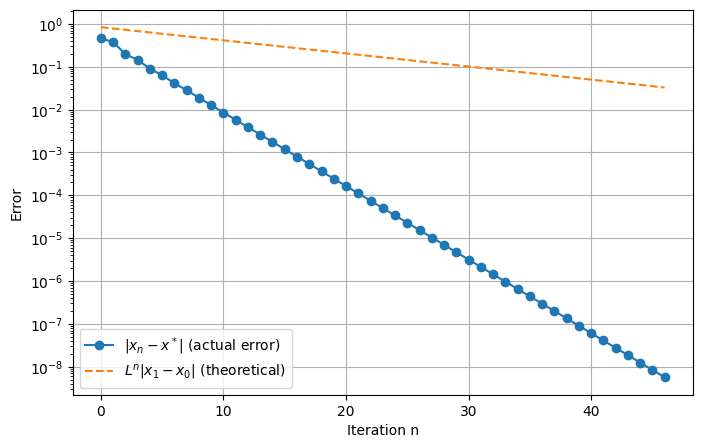

In [12]:
# Plot convergence of fixed-point method and compare
n_fp = len(conv_history_fp)
errors_fp = [abs(x_ex - x) for x in conv_history_fp]
print(errors_fp)

# Theoretical estimate for fixed-point iteration:
# for mapping with Lipschitz constant L < 1, error <= L^n * |x1 - x0|
# for cos(x), L = max|sin(x)| on [0, 1.2]
L = max([abs(sin(x)) for x in conv_history_fp])
initial_error = abs(conv_history_fp[1] - conv_history_fp[0]) if n_fp > 1 else 0
estimate_fp = [L**n * initial_error for n in range(n_fp)]

plt.figure(figsize=(8,5))
plt.semilogy(range(n_fp), errors_fp, marker='o', label=r'$|x_n - x^*|$ (actual error)')
plt.semilogy(range(n_fp), estimate_fp, '--', label=r'$L^n |x_1 - x_0|$ (theoretical)')
plt.xlabel('Iteration n')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

### Fixed-Point Convergence Observation

The plot above shows the actual error $|x_n - x^*|$ for the fixed-point iteration, compared to the theoretical estimate $L^n |x_1 - x_0|$ where $L$ is the maximum contraction constant (here, $L = \max|\sin(x)|$ on the interval).

**Observation:**
- The actual error decreases linearly, the theoretical estimate also decreases linearly. 

# Problem 3: Secant Method vs Newton Method

In [13]:
def secant(func: Callable[[float],float], x0: float, x1: float, eps: float = 1.0e-10, N_max: int = 100, x_star: float = None) -> tuple[list[float], list[float]]:

    f_x0 = func(x0)
    f_x1 = func(x1)
    conv_history = [x0, x1]
    error_history = []
    if x_star is not None:
        error_history.append(abs(x0 - x_star))
        error_history.append(abs(x1 - x_star))
    counter = 1
    print(f"{0:4d} {x0:.6e} {abs(f_x0):.6e}")
    print(f"{1:4d} {x1:.6e} {abs(f_x1):.6e}")
    while abs(f_x1) > eps and counter < N_max:
        if abs(f_x1 - f_x0) < 1.e-12:
            raise ValueError(f"Secant denominator too small at iteration {counter}")
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        f_x2 = func(x2)
        conv_history.append(x2)
        if x_star is not None:
            error_history.append(abs(x2 - x_star))
        counter += 1
        print(f"{counter:4d} {x2:.6e} {abs(f_x2):.6e}")
        x0, x1 = x1, x2
        f_x0, f_x1 = f_x1, f_x2
    if abs(f_x1) > eps:
        raise RuntimeError(f"Secant method failed to converge after {N_max} iterations")
    return conv_history, error_history

############################################################3
###########################################################


def newton(func: Callable[[float],float], fprime: Callable[[float],float], x: float, eps: float = 1.0e-10, N_max = 100, x_star: float = None) -> tuple[list[float], list[float]]:
    """
    Newton-Raphson method for scalar function
    Arguments:
        func: The function for which the root is to be found
        fprime: The derivative of the function
        x: initial guess
        eps: convergence tolerance (default 1.0e-10)
        N_max: maximum number of iterations (default 100)
        x_star: true root (for error calculation, optional)
    Returns:
        conv_history: convergence history of the root approximation
        error_history: error at each step (if x_star provided)
    """
    f_val = func(x)
    f_der = fprime(x)
    counter = 0
    conv_history = [x]
    error_history = []
    if x_star is not None:
        error_history.append(abs(x - x_star))
    print(f"{counter:4d} {x:.6e} {abs(f_val):.6e}")
    while abs(f_val) > eps:
        if abs(f_der) < 1.e-12:
            raise ValueError(f"Detected zero derivative (x = {x:.6e}) f'(x) = {f_der:.6e})")
        x -= f_val / f_der
        f_val = func(x)
        f_der = fprime(x)
        conv_history.append(x)
        if x_star is not None:
            error_history.append(abs(x - x_star))
        counter += 1
        print(f"{counter:4d} {x:.6e} {abs(f_val):.6e}")
        if counter >= N_max:
            raise RuntimeError(f"Newton iteration failed to converge after {N_max} iterations")
    return conv_history, error_history

We can now call the Secant Method with a lambda:

In [14]:
print("SECANT ITERATION")
conv_history_secant, errors_secant = secant(func=lambda x: x - cos(x), x0=1.2, x1=1.0, x_star=x_ex)
n_secant = len(conv_history_secant)

print("\nNEWTON ITERATION")
conv_history_newton, errors_newton = newton(func=lambda x: x - cos(x), fprime=lambda x: 1 + sin(x), x=1.2, x_star=x_ex)
n_newton = len(conv_history_newton)

SECANT ITERATION
   0 1.200000e+00 8.376422e-01
   1 1.000000e+00 4.596977e-01
   2 7.567380e-01 2.965863e-02
   3 7.399609e-01 1.465986e-03
   4 7.390885e-01 5.657759e-06
   5 7.390851e-01 1.093565e-09
   6 7.390851e-01 7.771561e-16

NEWTON ITERATION
   0 1.200000e+00 8.376422e-01
   1 7.664465e-01 4.606671e-02
   2 7.392457e-01 2.688083e-04
   3 7.390851e-01 9.530950e-09
   4 7.390851e-01 0.000000e+00


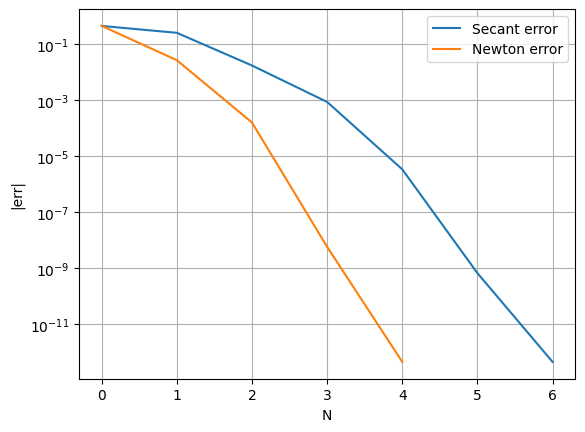

In [15]:
# N_fp = range(len(conv_history_fp))
N_secant = range(len(errors_secant))
N_newton = range(len(errors_newton))

# plt.semilogy(N_fp, errors_fp, label='Fixed-point error')
plt.semilogy(N_secant, errors_secant, label='Secant error')
plt.semilogy(N_newton, errors_newton, label='Newton error')
plt.xlabel('N')
plt.ylabel('|err|')
plt.legend()
plt.grid()